In [1]:
from pybatteryid import ModelStructure
from pybatteryid.model import save_to_file, print_model_details
from pybatteryid.plotter import plot_time_vs_current

from data import helper

### Example 1 - Model Identification for an NMC Battery

This file contains an example to identify battery models for a 1 Ah NMC battery. See [X] for more details.

#### A. Initialize model structure

In [2]:
# The LFP battery being modelled has the capacity around
# 1 Ah. The exact value has been calculated by coulomb-counting
# during GITT experiment.
battery_capacity = 3440.05372
# The experimental measurements were recorded with 1s
# sampling period.
sampling_period = 1

model_structure = ModelStructure(battery_capacity=battery_capacity, sampling_period=sampling_period)

#### B. Load EMF data

In [3]:
#
emf_data = helper.load_npy_data('data/nmc/gitt_data.npy')
model_structure.add_emf_function({'soc_values': emf_data['soc_values'],
                                  'voltage_values': emf_data['voltage_values']})

#### C. Add Basis Functions

In [4]:
model_structure.add_basis_functions(['d[0.01,0.99]', 's', '1/s', 'log[s]', 'exp[0.05*sqrt[|i|]]'])

#### D. Identify a battery model

We identify a battery model for given model order $n$ and nonlinearity order $l$.

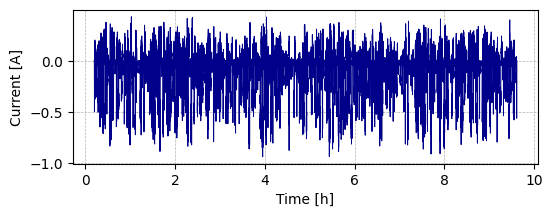

In [5]:
# 
dataset = helper.load_npy_data(f'data/nmc/identification_data.npy')
#
plot_time_vs_current([(dataset['time'] / 3600, dataset['current'])],
                     units=('h', 'A'), colors=['darkblue'])

In [6]:
identification_dataset = {'time_values': dataset['time'],
                          'current_values': dataset['current'],
                          'voltage_values': dataset['voltage']}
#
model = model_structure.identify(identification_dataset, initial_soc=dataset['initial_soc'],
                                 model_order=3, nonlinearity_order=4,
                                 optimizers=['lasso.sklearn', 'ridge.sklearn'])

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Inverse condition number of regression matrix: 6.632218491542159e-23                                            │
│ Dimensions of regression matrix: (33897 rows, 595 columns)                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Performing cross-validated LASSO using `sklearn` package.                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

.........................

Solution found using lambda_1 = 2 * alpha * n_samples = 4.00

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Performing cross-validated Ridge regression using `sklearn` package.                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Solution found using lambda_2 = alpha = 0.01

#### E. Print Model Details

In [7]:
#
print_model_details(model)

                                      Model order = 3; Nonlinearity order = 4                                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Model Term                                                                            ┃ Estimated Parameter     ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ v(k-1)                                                                                │ 0.9885141351571477      │
│ v(k-1)×d[0.01,0.99](k-1)                                                              │ 0.012315426109527444    │
│ v(k-1)×1/s(k-1)                                                                       │ 0.00038267128731395497  │
│ v(k-1)×d[0.01,0.99](k-1)×1/s(k-1)                                                     │ -0.0004744262782126495  │
│ v(k-2)×d[0.01,0.99](k-2)×1/s(k-2)                                                     │ -0.005519175013324466   │
│ v(k-2)×d[0.01,0.99](k-2)×1/s(k-2)×exp[0.05*sqrt[|i|]](k-2)                            │ -0.013385971448580012   │
│ v(k-2)×d[0.01,0.99](k-2)×1/s(k-2)×exp[0.05*sqrt[|i|]](k-2)×exp[0.05*sqrt[|i|]](k-2)   │ 0.018873802698091927    │
│ v(k-3)×d[0.01,0.99](k-3)×1/s(k-3)                                                     │ -0.011560935779634391   │
│ v(k-3)×d[0.01,0.99](k-3)×1/s(k-3)×exp[0.05*sqrt[|i|]](k-3)                            │ -0.008893280243026576   │
│ v(k-3)×d[0.01,0.99](k-3)×1/s(k-3)×exp[0.05*sqrt[|i|]](k-3)×exp[0.05*sqrt[|i|]](k-3)   │ 0.02034622623054919     │
│ i(k)                                                                                  │ 0.041018928622813325    │
│ i(k)×d[0.01,0.99](k)                                                                  │ 0.09016920490389749     │
│ i(k)×1/s(k)                                                                           │ 0.07712873300436374     │
│ i(k)×d[0.01,0.99](k)×s(k)                                                             │ -0.023545438860429677   │
│ i(k)×d[0.01,0.99](k)×1/s(k)                                                           │ 0.03349609735143066     │
│ i(k)×s(k)×exp[0.05*sqrt[|i|]](k)                                                      │ -0.01601642533334543    │
│ i(k)×1/s(k)×1/s(k)                                                                    │ 0.0017862348564896824   │
│ i(k)×1/s(k)×log[s](k)                                                                 │ 0.010785256074157173    │
│ i(k)×1/s(k)×exp[0.05*sqrt[|i|]](k)                                                    │ 0.021741327906287165    │
│ i(k)×exp[0.05*sqrt[|i|]](k)×exp[0.05*sqrt[|i|]](k)                                    │ 0.012757243755932226    │
│ i(k)×d[0.01,0.99](k)×1/s(k)×1/s(k)                                                    │ -0.00020882397885502524 │
│ i(k)×d[0.01,0.99](k)×1/s(k)×log[s](k)                                                 │ 0.020970784226697348    │
│ i(k)×d[0.01,0.99](k)×1/s(k)×exp[0.05*sqrt[|i|]](k)                                    │ 0.008005409132350429    │
│ i(k)×d[0.01,0.99](k)×exp[0.05*sqrt[|i|]](k)×exp[0.05*sqrt[|i|]](k)                    │ 0.005528046280112133    │
│ i(k)×1/s(k)×log[s](k)×exp[0.05*sqrt[|i|]](k)                                          │ 0.007014314935863615    │
│ i(k)×1/s(k)×exp[0.05*sqrt[|i|]](k)×exp[0.05*sqrt[|i|]](k)                             │ -0.010665465504822905   │
│ i(k)×log[s](k)×log[s](k)×log[s](k)                                                    │ 0.05659149950873965     │
│ i(k)×exp[0.05*sqrt[|i|]](k)×exp[0.05*sqrt[|i|]](k)×exp[0.05*sqrt[|i|]](k)             │ 0.011232216172096415    │
│ i(k)×d[0.01,0.99](k)×1/s(k)×log[s](k)×exp[0.05*sqrt[|i|]](k)                          │ -0.028282155371490387   │
│ i(k)×d[0.01,0.99](k)×1/s(k)×exp[0.05*sqrt[|i|]](k)×exp[0.05*sqrt[|i|]](k)             │ -0.05063303333378212    │
│ i(k)×d[0.01,0.99](k)×log[s](k)×log[s](k)×log[s](k)    

#### F. Save Model to File

In [8]:
save_to_file(model, 'results/nmc', 'model')